# Notebook 03: Figure Replication from Li et al. (2022)

## Purpose
This notebook replicates key figures from the epcoritamab PBPK/PD modeling paper (Li et al., *Clin Pharmacol Ther*, 2022). The goal is to validate our model implementation by comparing simulated results against published figures.

## Figures Replicated

### **Figure 2: Exposure-Response (ORR vs C_avg)**
- Emax model for overall response rate (ORR) vs average plasma concentration
- Shows 5th, 50th, and 95th percentiles with 90% CIs
- Validates PK-PD link and dose selection rationale

### **Figure 3: Tumor Diameter Change from Baseline**
- Individual patient trajectories showing tumor growth/regression
- 12 dose levels (0.0128 - 60 mg) in 3×4 grid
- Gray spaghetti plots showing inter-patient variability

### **Figure 4: B-cell Depletion**
- Change from baseline in blood B-cell count (% of baseline)
- 12 dose levels in 3×4 grid over Cycle 1 (Days 0-28)
- Black dashed line shows median, gray shading shows 90% CI
- Demonstrates dose-dependent B-cell depletion kinetics

### **Figure 5: T-cell Dynamics**
- **Panel (a)**: Cycle 1 (Days 0-28) - Early T-cell activation and redistribution
- **Panel (b)**: Cycles 1-6 (Days 0-168) - Long-term T-cell expansion
- Shows oscillations due to injection effects and dose-dependent clonal expansion

### **Figure 6: Exposure-Safety Analysis (CRS)**
- **Panel (a)**: CRS (any grade) vs C_max after each dose interval
- **Panel (b)**: Grade 2 CRS vs C_max
- Demonstrates flat relationship between exposure and CRS risk

### **Figure 7: Trimer Formation and ORR by Tumor Type**
- **Panels (a,b)**: Average trimers per tumor cell (DLBCL vs FL)
- **Panels (c,d)**: Simulated clinical trial ORR (DLBCL vs FL)
- Shows differential efficacy by tumor growth rate

## Simulation Settings
- **Common trajectory data**: 100-128 virtual patients per dose
- **Time horizon**: 168 days (6 cycles)
- **Dose range**: 0.0128 - 60 mg (clinical trial range)
- **Inter-patient variability**: Lognormal sampling of key parameters

## Usage
1. **Cell 2**: Generate common trajectory data (`dose_to_trajs`) - reused across figures
2. **Cells 3-7**: Individual figure generation (can run independently)
3. Output images saved to `notebooks/` directory

## Notes
- Figure 7 has a "quick test" version (6 doses, 50 patients) that runs in ~4 minutes
- Full Figure 7 (15 doses, 100 patients, 100 trials) takes ~3-5 hours
- Some figures show model limitations (ex:Figure 3 low-dose responses require parameter calibration)

---

In [ ]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt 
import numpy as np

NOTEBOOK_DIR = Path().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parent  

sys.path.append(str(PROJECT_ROOT))
print("Added to sys.path:", PROJECT_ROOT)

Added to sys.path: D:\User Data\Downloads\epcoritamab-pbpk-pd


# Figure 3

In [ ]:
from src.epco_model.monte_carlo import simulate_population_trajectories_for_dose
from src.epco_model.state_vector import StateIx

full_doses = [0.0128, 0.04, 0.12, 0.38, 0.76, 1.5, 3.0, 6.0, 12.0, 24.0, 48.0, 60.0]

dose_to_trajs = {}

for d in full_doses:
    t, Ys, meta = simulate_population_trajectories_for_dose(
        full_mg=d,
        n_patients=100,
        t_end=168.0,
        seed=2025,
    )
    dose_to_trajs[d] = (t, Ys, meta)

[Traj] Dose 0.0128 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.0128 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.0128 mg in 9.36s
[Traj] Dose 0.04 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.04 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.04 mg in 6.26s
[Traj] Dose 0.12 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.12 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.12 mg in 7.10s
[Traj] Dose 0.38 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.38 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.38 mg in 8.50s
[Traj] Dose 0.76 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.76 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.76 mg in 8.82s
[Traj] Dose 1.5 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 1.5 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 1.5 mg in 8.66s
[Traj] Dose 3.0 mg: n_patients=100, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 3.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 3.0 mg in 7.93s
[Traj] Dose 6.0 mg: n_patients=100, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 6.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 6.0 mg in 13.21s
[Traj] Dose 12.0 mg: n_patients=100, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 12.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 12.0 mg in 12.52s
[Traj] Dose 24.0 mg: n_patients=100, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 24.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 24.0 mg in 18.04s
[Traj] WARNING: 2/100 patients failed for dose 24.0 mg
[Traj] Dose 48.0 mg: n_patients=100, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 48.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 48.0 mg in 10.51s
[Traj] WARNING: 3/100 patients failed for dose 48.0 mg
[Traj] Dose 60.0 mg: n_patients=100, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 60.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 60.0 mg in 8.79s
[Traj] WARNING: 4/100 patients failed for dose 60.0 mg


Simulating dose 0.0128 mg...
[Traj] Dose 0.0128 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.0128 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 0.0128 mg in 7.81s
Simulating dose 0.04 mg...
[Traj] Dose 0.04 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.04 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 0.04 mg in 8.42s
Simulating dose 0.12 mg...
[Traj] Dose 0.12 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.12 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 0.12 mg in 10.14s
Simulating dose 0.38 mg...
[Traj] Dose 0.38 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.38 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 0.38 mg in 10.10s
Simulating dose 0.76 mg...
[Traj] Dose 0.76 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.76 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 0.76 mg in 9.34s
Simulating dose 1.5 mg...
[Traj] Dose 1.5 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 1.5 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 1.5 mg in 10.11s
Simulating dose 3.0 mg...
[Traj] Dose 3.0 mg: n_patients=128, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 3.0 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 3.0 mg in 11.13s
Simulating dose 6.0 mg...
[Traj] Dose 6.0 mg: n_patients=128, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 6.0 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 6.0 mg in 16.25s
Simulating dose 12.0 mg...
[Traj] Dose 12.0 mg: n_patients=128, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 12.0 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 12.0 mg in 18.07s
Simulating dose 24.0 mg...
[Traj] Dose 24.0 mg: n_patients=128, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 24.0 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 24.0 mg in 17.64s
[Traj] WARNING: 2/128 patients failed for dose 24.0 mg
Simulating dose 48.0 mg...
[Traj] Dose 48.0 mg: n_patients=128, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 48.0 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 48.0 mg in 14.90s
[Traj] WARNING: 4/128 patients failed for dose 48.0 mg
Simulating dose 60.0 mg...
[Traj] Dose 60.0 mg: n_patients=128, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 60.0 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 60.0 mg in 13.65s
[Traj] WARNING: 5/128 patients failed for dose 60.0 mg

Saved: figure3_tumor_diameter.png
Plotted 12 doses


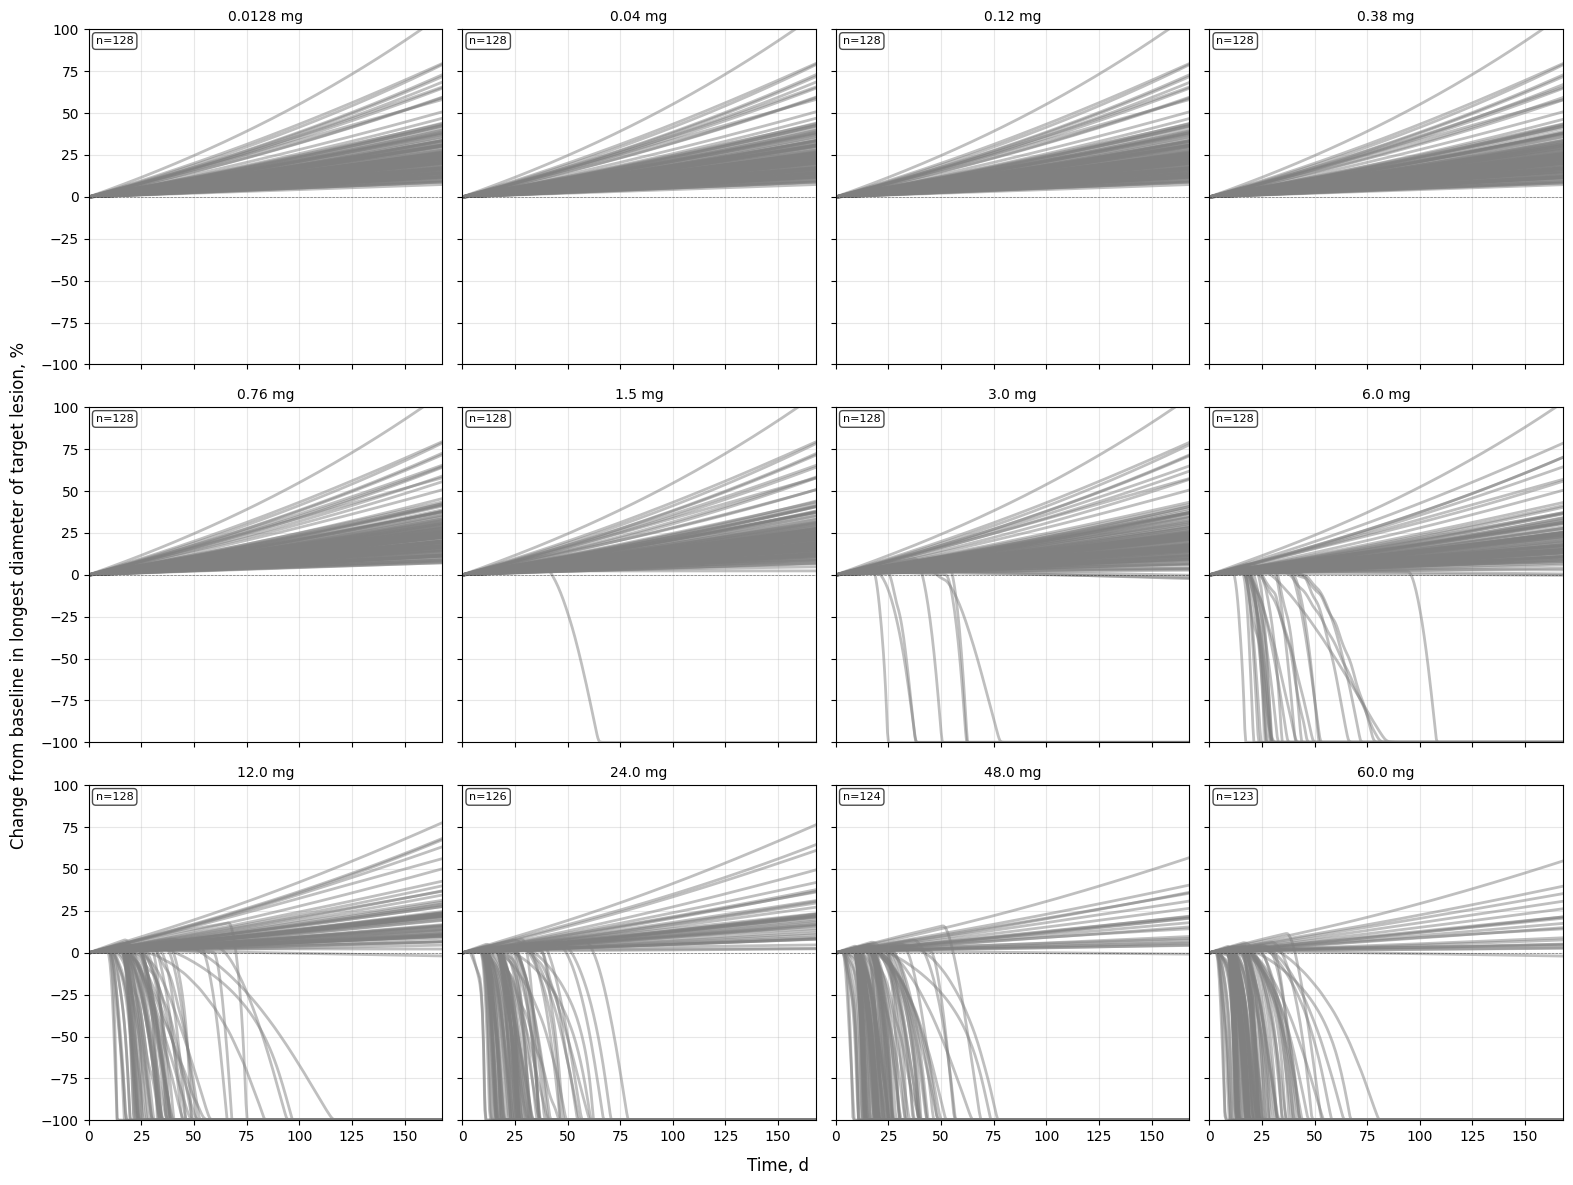

In [ ]:
"""
Figure 3: Tumor Lesion Diameter Change from Baseline

"""

import numpy as np
import matplotlib.pyplot as plt
from math import pi

from src.epco_model.monte_carlo import simulate_population_trajectories_for_dose
from src.epco_model.state_vector import StateIx


# -------------------------------------------------------------------------
# Configuration
# -------------------------------------------------------------------------
TUMOR_CELL_DENSITY = 1e9 # cells / cm^3

full_doses = [0.0128, 0.04, 0.12, 0.38, 0.76, 1.5, 3.0, 6.0, 12.0, 24.0, 48.0, 60.0]

# -------------------------------------------------------------------------
# Helper Functions
# -------------------------------------------------------------------------

def lesion_diameter_change_percent(y):
    """
    Compute change from baseline in longest diameter of target lesion, %.
    
    Args:
        y: state vector [n_states, n_time]
    
    Returns:
        change_percent: array [n_time] with % change from baseline
                       0% = no change, -100% = complete regression
    """
    N_tumor = y[StateIx.TUMOR_CELLS_TOTAL] # [n_time]
    
    # Convert to diameter 
    # Volume = N / density, then r = (3V/(4π))^(1/3), diameter = 2r
    volume_cm3 = N_tumor / TUMOR_CELL_DENSITY
    r_cm = np.zeros_like(volume_cm3)
    mask = volume_cm3 > 0
    r_cm[mask] = (3.0 * volume_cm3[mask] / (4.0 * pi)) ** (1.0 / 3.0)
    diameter = 2.0 * r_cm 

    # Baseline diameter (at t=0)
    diameter_0 = diameter[0]
    
    if diameter_0 <= 0:
        return np.zeros_like(diameter)
    
    # Change from baseline as percentage
    change_percent = 100.0 * (diameter - diameter_0) / diameter_0
    
    return change_percent


# -------------------------------------------------------------------------
# Run Simulations
# -------------------------------------------------------------------------
dose_to_trajs = {}

for d in full_doses:
    print(f"Simulating dose {d} mg...")
    t, Ys, meta = simulate_population_trajectories_for_dose(
        full_mg=d,
        n_patients=128,
        t_end=168.0,
        seed=2025,
        n_jobs=-1,
        backend="loky",
    )
    dose_to_trajs[d] = (t, Ys, meta)


# -------------------------------------------------------------------------
# Create Figure
# -------------------------------------------------------------------------
fig, axes = plt.subplots(3, 4, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.ravel()

for ax, dose in zip(axes, full_doses):
    t, Ys, meta = dose_to_trajs[dose]
    
    # Plot all trajectories in gray 
    n_plotted = 0
    for i, y in enumerate(Ys):
        if y is None:
            continue
        
        # Compute lesion diameter change
        change_pct = lesion_diameter_change_percent(y)
        
        # All lines gray with thicker linewidth (as in paper)
        ax.plot(t, change_pct, color='gray', alpha=0.5, linewidth=2.0)
        n_plotted += 1
    
    ax.set_title(f"{dose} mg", fontsize=10)
    ax.set_xlim(0, 168)
    ax.set_ylim(-100, 100)
    ax.axhline(0, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.grid(True, alpha=0.3)
    
    ax.text(0.02, 0.98, f"n={n_plotted}", transform=ax.transAxes,
            verticalalignment='top', fontsize=8, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Shared labels
fig.text(0.5, 0.02, "Time, d", ha="center", fontsize=12)
fig.text(0.02, 0.5, "Change from baseline in longest diameter of target lesion, %", 
         va="center", rotation="vertical", fontsize=12)

plt.tight_layout(rect=[0.03, 0.03, 1, 1])
plt.savefig('figure3_tumor_diameter.png', dpi=300, bbox_inches='tight')
print(f"\nSaved: figure3_tumor_diameter.png")
print(f"Plotted {len(full_doses)} doses")

plt.show()

# Figure 4

In [ ]:
from src.epco_model.monte_carlo import simulate_population_trajectories_for_dose
from src.epco_model.state_vector import StateIx

dose_to_bcells = {}

for d in full_doses:
    t, Ys, meta = simulate_population_trajectories_for_dose(
        full_mg=d,
        n_patients=100,
        t_end=28.0,      
        seed=2025,
       
    )
    dose_to_bcells[d] = (t, Ys, meta)


def bcell_percent_of_baseline(y):
    """
    Compute B-cell count as percent of baseline.
    Returns 100% at baseline, dropping toward 0% as B-cells are depleted.
    If the figure shows inverted scale, we can easily change to signed change: 100*(B-B0)/B0
    """
    B = y[StateIx.B_BLOOD] # [n_time]
    B0 = B[0]
    return 100.0 * B / B0  # 100% at baseline, dropping toward 0


[Traj] Dose 0.0128 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.0128 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.0128 mg in 1.80s
[Traj] Dose 0.04 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.04 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.04 mg in 1.58s
[Traj] Dose 0.12 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.12 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.12 mg in 1.65s
[Traj] Dose 0.38 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.38 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.38 mg in 1.86s
[Traj] Dose 0.76 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.76 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.76 mg in 2.12s
[Traj] Dose 1.5 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 1.5 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 1.5 mg in 2.42s
[Traj] Dose 3.0 mg: n_patients=100, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 3.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 3.0 mg in 2.32s
[Traj] Dose 6.0 mg: n_patients=100, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 6.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 6.0 mg in 2.11s
[Traj] Dose 12.0 mg: n_patients=100, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 12.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 12.0 mg in 2.20s
[Traj] Dose 24.0 mg: n_patients=100, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 24.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 24.0 mg in 3.77s
[Traj] Dose 48.0 mg: n_patients=100, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 48.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 48.0 mg in 3.55s
[Traj] WARNING: 3/100 patients failed for dose 48.0 mg
[Traj] Dose 60.0 mg: n_patients=100, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 60.0 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 60.0 mg in 5.48s
[Traj] WARNING: 4/100 patients failed for dose 60.0 mg


Saved: figure4_bcell_depletion.png


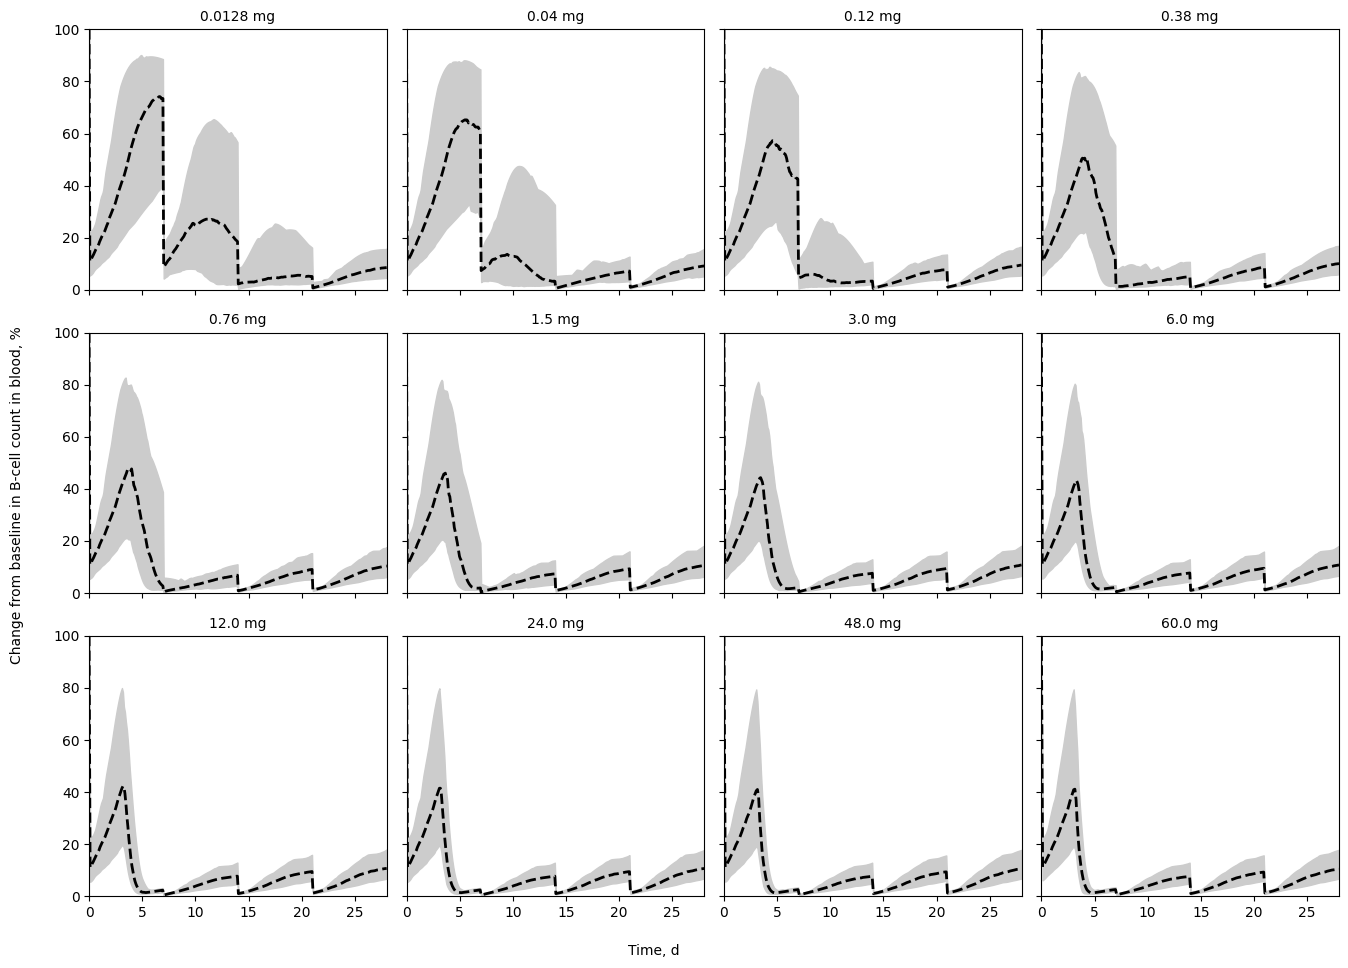

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 4, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.ravel()

for ax, d in zip(axes, full_doses):
    t, Ys, meta = dose_to_bcells[d]
    
    curves = []
    for y in Ys:
        if y is None:
            continue
        curves.append(bcell_percent_of_baseline(y))
    curves = np.stack(curves, axis=0)
    
    median = np.median(curves, axis=0)
    p5 = np.percentile(curves, 5, axis=0)
    p95 = np.percentile(curves, 95, axis=0)

    # Gray 90% band
    ax.fill_between(t, p5, p95, color="0.8", alpha=1.0)

    # Black dashed median
    ax.plot(t, median, "k--", linewidth=2)

    ax.set_title(f"{d} mg", fontsize=10)
    ax.set_xlim(0, 28)
    ax.set_ylim(0, 100)


fig.text(0.5, 0.04, "Time, d", ha="center")
fig.text(0.04, 0.5, "Change from baseline in B-cell count in blood, %", va="center", rotation="vertical")

plt.tight_layout(rect=[0.06, 0.06, 1, 1])
plt.savefig('figure4_bcell_depletion.png', dpi=300, bbox_inches='tight')
print("Saved: figure4_bcell_depletion.png")
plt.show()

# Figure 2: Exposure-Response Validation (Emax Model)

**Goal**: Compare clinical tumor response rates vs drug exposure (C_avg at Day 84), using both clinical data and an Emax exposure–response model.

**What to simulate:**
1. For each dose → simulate C_avg distribution (average concentration over Days 0-84)
2. Fit/replicate the Emax model (P(response) = E_max * C^h / (EC50^h + C^h))
3. Simulate 100 "synthetic trials" of response using the Emax model
4. Plot predictive bands + overlay clinical data

**Figure elements:**
- Black solid line = Emax model–predicted probability of clinical response
- Black dashed = 90% CI of Emax model
- Green = simulated median response probability from 100 trial replicates
- Blue/red = simulated 95th and 5th percentiles + CIs
- Open circles = individual clinical responders vs non-responders
- Filled circles = observed ORR per C_avg quartile
- Inverted triangles = PK-model–predicted mean C_avg per dose


## Figure 2 




Computing C_avg distributions...
Simulating dose 0.0128 mg...
[Traj] Dose 0.0128 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.0128 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 0.0128 mg in 8.14s
Simulating dose 0.064 mg...
[Traj] Dose 0.064 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.064 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 0.064 mg in 8.34s
Simulating dose 0.32 mg...
[Traj] Dose 0.32 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.32 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 0.32 mg in 9.63s
Simulating dose 1.6 mg...
[Traj] Dose 1.6 mg: n_patients=128, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 1.6 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 1.6 mg in 13.34s
Simulating dose 8 mg...
[Traj] Dose 8 mg: n_patients=128, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 8 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 8 mg in 16.88s
Simulating dose 24 mg...
[Traj] Dose 24 mg: n_patients=128, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 24 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 24 mg in 18.54s
[Traj] WARNING: 2/128 patients failed for dose 24 mg
Simulating dose 48 mg...
[Traj] Dose 48 mg: n_patients=128, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 48 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 48 mg in 14.70s
[Traj] WARNING: 4/128 patients failed for dose 48 mg
Simulating dose 60 mg...
[Traj] Dose 60 mg: n_patients=128, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 60 mg:   0%|          | 0/128 [00:00<?, ?it/s]

[Traj] Completed 128 patients at 60 mg in 13.63s
[Traj] WARNING: 5/128 patients failed for dose 60 mg
Dose  0.0128 mg: 128/128 patients, C_avg median=  0.001 nM, mean=  0.001 nM
Dose  0.0640 mg: 128/128 patients, C_avg median=  0.007 nM, mean=  0.008 nM
Dose  0.3200 mg: 128/128 patients, C_avg median=  0.042 nM, mean=  0.050 nM
Dose  1.6000 mg: 128/128 patients, C_avg median=  0.321 nM, mean=  0.347 nM
Dose  8.0000 mg: 128/128 patients, C_avg median=  1.946 nM, mean=  2.096 nM
Dose 24.0000 mg: 126/128 patients, C_avg median=  6.195 nM, mean=  6.800 nM
Dose 48.0000 mg: 124/128 patients, C_avg median= 12.471 nM, mean= 14.063 nM
Dose 60.0000 mg: 123/128 patients, C_avg median= 15.764 nM, mean= 17.834 nM

C_avg range: 0.001 - 15.764 nM

Running 100 synthetic trials...
  Trial 1/100...
  Trial 21/100...
  Trial 41/100...
  Trial 61/100...
  Trial 81/100...

Saved: figure2_exposure_response.png
Summary:
Doses tested: 8
C_avg range: 0.0012 - 15.76 nM
ORR range (median): 0.0% - 72.5%
Emax para

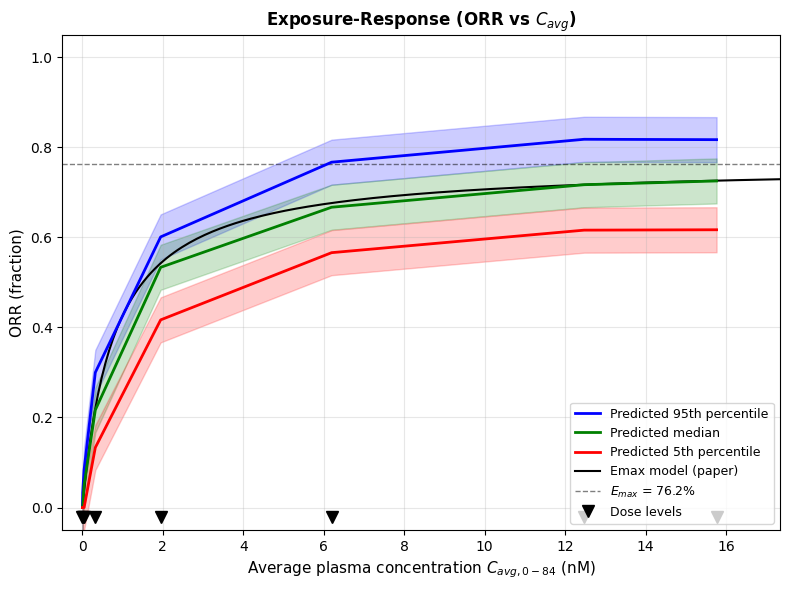

In [ ]:
"""
Figure 2: Exposure-Response (ORR vs C_avg at Day 84)

"""

import numpy as np
import matplotlib.pyplot as plt
from src.epco_model.monte_carlo import simulate_population_trajectories_for_dose, compute_cavg_distributions
from src.epco_model.parameters import get_default_parameters

# -------------------------------------------------------------------------
# Configuration
# -------------------------------------------------------------------------

# Paper-reported Emax parameters
EMAX_PARAMS = {
    'E_max': 0.762,   # 76.2% as fraction
    'EC50': 0.788,    # nM
    'h': 1.0,         # Hill coefficient
}

doses_mg = [0.0128, 0.064, 0.32, 1.6, 8, 24, 48, 60]
n_trials = 100
n_patients_per_trial = 60

# -------------------------------------------------------------------------
# Helper Functions
# -------------------------------------------------------------------------

def emax_model(C_avg, E_max, EC50, h=1.0):
    """Emax model for response probability."""
    return E_max * (C_avg ** h) / (EC50 ** h + C_avg ** h)


def simulate_synthetic_trial(dose_to_cavg, emax_params, n_patients_per_dose, seed=None):
    """
    Simulate one synthetic trial using Emax model.
    
    Returns:
        dose_to_orr: dict mapping dose -> ORR (0-1)
    """
    rng = np.random.default_rng(seed)
    
    E_max = emax_params['E_max']
    EC50 = emax_params['EC50']
    h = emax_params['h']
    
    dose_to_orr = {}
    
    for dose, cavg_array in dose_to_cavg.items():
        # Sample C_avg values (with replacement)
        valid_cavg = cavg_array[~np.isnan(cavg_array)]
        if len(valid_cavg) == 0:
            dose_to_orr[dose] = 0.0
            continue
        
        sampled_cavg = rng.choice(valid_cavg, size=n_patients_per_dose, replace=True)
        
        # Compute response probabilities and sample binary responses
        p_response = emax_model(sampled_cavg, E_max, EC50, h)
        responses = rng.binomial(1, p_response)
        
        # Compute ORR
        orr = np.mean(responses)
        dose_to_orr[dose] = orr
    
    return dose_to_orr


# -------------------------------------------------------------------------
# Run Simulations
# -------------------------------------------------------------------------
print("\nComputing C_avg distributions...")
dose_to_trajs = {}

for d in doses_mg:
    print(f"Simulating dose {d} mg...")
    t, Ys, meta = simulate_population_trajectories_for_dose(
        full_mg=d,
        n_patients=128,
        t_end=168.0,
        seed=2025,
        n_jobs=-1,
        backend="loky"
    )
    dose_to_trajs[d] = (t, Ys, meta)

# Compute C_avg distributions (Days 0-84)
dose_to_cavg = compute_cavg_distributions(
    dose_to_trajs=dose_to_trajs,
    t_end=84.0,
)

# Compute median C_avg per dose (for x-axis)
cavg_median_per_dose = np.array([
    np.nanmedian(dose_to_cavg[d]) for d in doses_mg
])

print(f"\nC_avg range: {cavg_median_per_dose.min():.3f} - {cavg_median_per_dose.max():.3f} nM")

print(f"\nRunning {n_trials} synthetic trials...")
orr_trials_by_dose = {d: [] for d in doses_mg}

for k in range(n_trials):
    if k % 20 == 0:
        print(f"  Trial {k+1}/{n_trials}...")
    
    dose_to_orr = simulate_synthetic_trial(
        dose_to_cavg=dose_to_cavg,
        emax_params=EMAX_PARAMS,
        n_patients_per_dose=n_patients_per_trial,
        seed=10_000 + k,
    )
    
    for d, orr in dose_to_orr.items():
        orr_trials_by_dose[d].append(orr)

#Compute percentiles (5th, 50th, 95th) per dose
orr_p5 = []
orr_p50 = []
orr_p95 = []

for d in doses_mg:
    arr = np.array(orr_trials_by_dose[d])
    orr_p5.append(np.percentile(arr, 5))
    orr_p50.append(np.percentile(arr, 50))
    orr_p95.append(np.percentile(arr, 95))

orr_p5 = np.array(orr_p5)
orr_p50 = np.array(orr_p50)
orr_p95 = np.array(orr_p95)

# -------------------------------------------------------------------------
# Create Figure
# -------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Plot 95th percentile (blue)
ax.plot(cavg_median_per_dose, orr_p95, 'b-', linewidth=2, 
        label='Predicted 95th percentile', zorder=3)
ax.fill_between(cavg_median_per_dose, 
                orr_p95 - 0.05, orr_p95 + 0.05, # Small band for visualization
                color='blue', alpha=0.2, zorder=1)

# Plot median/50th percentile (green)
ax.plot(cavg_median_per_dose, orr_p50, 'g-', linewidth=2, 
        label='Predicted median', zorder=3)
ax.fill_between(cavg_median_per_dose, 
                orr_p50 - 0.05, orr_p50 + 0.05,
                color='green', alpha=0.2, zorder=1)

# Plot 5th percentile (red)
ax.plot(cavg_median_per_dose, orr_p5, 'r-', linewidth=2, 
        label='Predicted 5th percentile', zorder=3)
ax.fill_between(cavg_median_per_dose, 
                orr_p5 - 0.05, orr_p5 + 0.05,
                color='red', alpha=0.2, zorder=1)

# Emax model curve (paper parameters)
C_grid = np.linspace(0, cavg_median_per_dose.max() * 1.2, 200)
P_grid = emax_model(C_grid, EMAX_PARAMS['E_max'], EMAX_PARAMS['EC50'], EMAX_PARAMS['h'])
ax.plot(C_grid, P_grid, 'k-', linewidth=1.5, label='Emax model (paper)', zorder=2)

# E_max horizontal line
ax.axhline(EMAX_PARAMS['E_max'], color='k', linestyle='--', 
           linewidth=1, alpha=0.5, label=f'$E_{{max}}$ = {EMAX_PARAMS["E_max"]*100:.1f}%')

# Dose markers (inverted triangles at mean C_avg per dose)
ax.plot(cavg_median_per_dose, np.zeros_like(cavg_median_per_dose) - 0.02, 
        'v', color='black', markersize=8, label='Dose levels', zorder=4)

ax.set_xlabel('Average plasma concentration $C_{avg,0-84}$ (nM)', fontsize=11)
ax.set_ylabel('ORR (fraction)', fontsize=11)
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(-0.5, cavg_median_per_dose.max() * 1.1)
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right', fontsize=9)
ax.set_title('Exposure-Response (ORR vs $C_{avg}$)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('figure2_exposure_response.png', dpi=300, bbox_inches='tight')
print("\nSaved: figure2_exposure_response.png")

# Print summary
print("Summary:")
print(f"Doses tested: {len(doses_mg)}")
print(f"C_avg range: {cavg_median_per_dose.min():.4f} - {cavg_median_per_dose.max():.2f} nM")
print(f"ORR range (median): {orr_p50.min():.1%} - {orr_p50.max():.1%}")
print(f"Emax parameters: E_max={EMAX_PARAMS['E_max']*100:.1f}%, EC50={EMAX_PARAMS['EC50']:.3f} nM")
plt.show()

# Figure 5

Running simulations for all 12 doses...
Dose  0.0128 mg...
[Traj] Dose 0.0128 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.0128 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.0128 mg in 7.28s
-> 0/100 failed

Dose  0.0400 mg...
[Traj] Dose 0.04 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.04 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.04 mg in 6.66s
-> 0/100 failed

Dose  0.1200 mg...
[Traj] Dose 0.12 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.12 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.12 mg in 6.75s
-> 0/100 failed

Dose  0.3800 mg...
[Traj] Dose 0.38 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.38 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.38 mg in 7.17s
-> 0/100 failed

Dose  0.7600 mg...
[Traj] Dose 0.76 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.76 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.76 mg in 7.65s
-> 0/100 failed

Dose  1.5000 mg...
[Traj] Dose 1.5 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 1.5 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 1.5 mg in 9.64s
-> 0/100 failed

Dose  3.0000 mg...
[Traj] Dose 3 mg: n_patients=100, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 3 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 3 mg in 9.11s
-> 0/100 failed

Dose  6.0000 mg...
[Traj] Dose 6 mg: n_patients=100, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 6 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 6 mg in 13.91s
-> 0/100 failed

Dose 12.0000 mg...
[Traj] Dose 12 mg: n_patients=100, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 12 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 12 mg in 11.73s
-> 0/100 failed

Dose 24.0000 mg...
[Traj] Dose 24 mg: n_patients=100, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 24 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 24 mg in 17.48s
[Traj] WARNING: 2/100 patients failed for dose 24 mg
-> 2/100 failed

Dose 48.0000 mg...
[Traj] Dose 48 mg: n_patients=100, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 48 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 48 mg in 9.39s
[Traj] WARNING: 3/100 patients failed for dose 48 mg
-> 3/100 failed

Dose 60.0000 mg...
[Traj] Dose 60 mg: n_patients=100, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 60 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 60 mg in 10.52s
[Traj] WARNING: 4/100 patients failed for dose 60 mg
-> 4/100 failed

Subplot  1:  0.0128 mg
Subplot  2:    0.04 mg
Subplot  3:    0.12 mg
Subplot  4:    0.38 mg
Subplot  5:    0.76 mg
Subplot  6:     1.5 mg
Subplot  7:       3 mg
Subplot  8:       6 mg
Subplot  9:      12 mg
Subplot 10:      24 mg
Subplot 11:      48 mg
Subplot 12:      60 mg

Saved: figure5a_tcell_cycle1.png


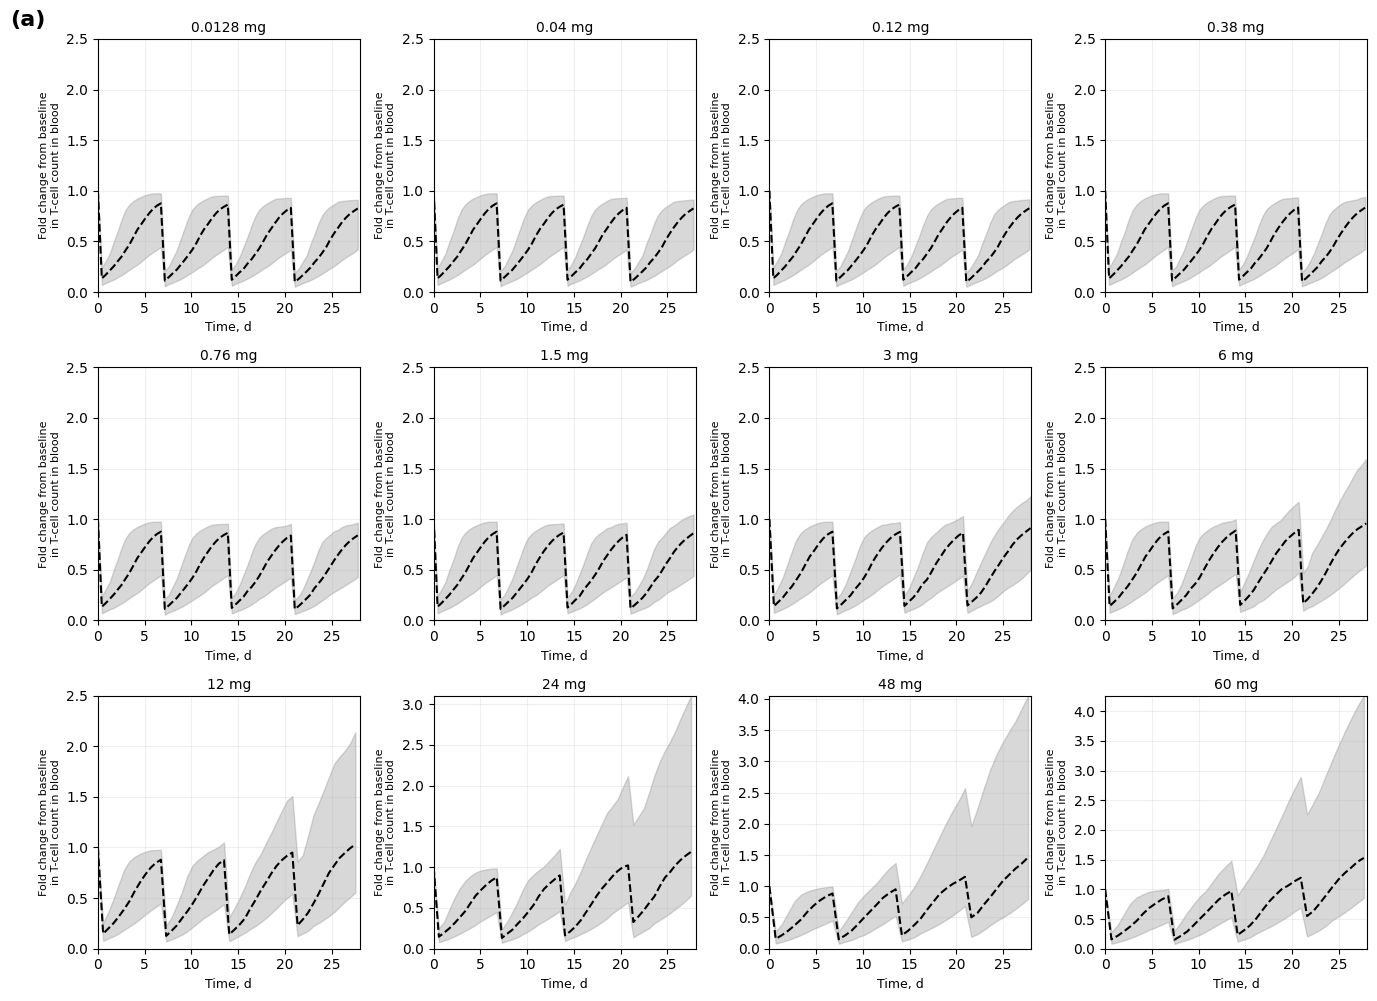


Subplot  1:  0.0128 mg
Subplot  2:    0.04 mg
Subplot  3:    0.12 mg
Subplot  4:    0.38 mg
Subplot  5:    0.76 mg
Subplot  6:     1.5 mg
Subplot  7:       3 mg
Subplot  8:       6 mg
Subplot  9:      12 mg
Subplot 10:      24 mg
Subplot 11:      48 mg
Subplot 12:      60 mg

Saved: figure5b_tcell_cycles1to6.png


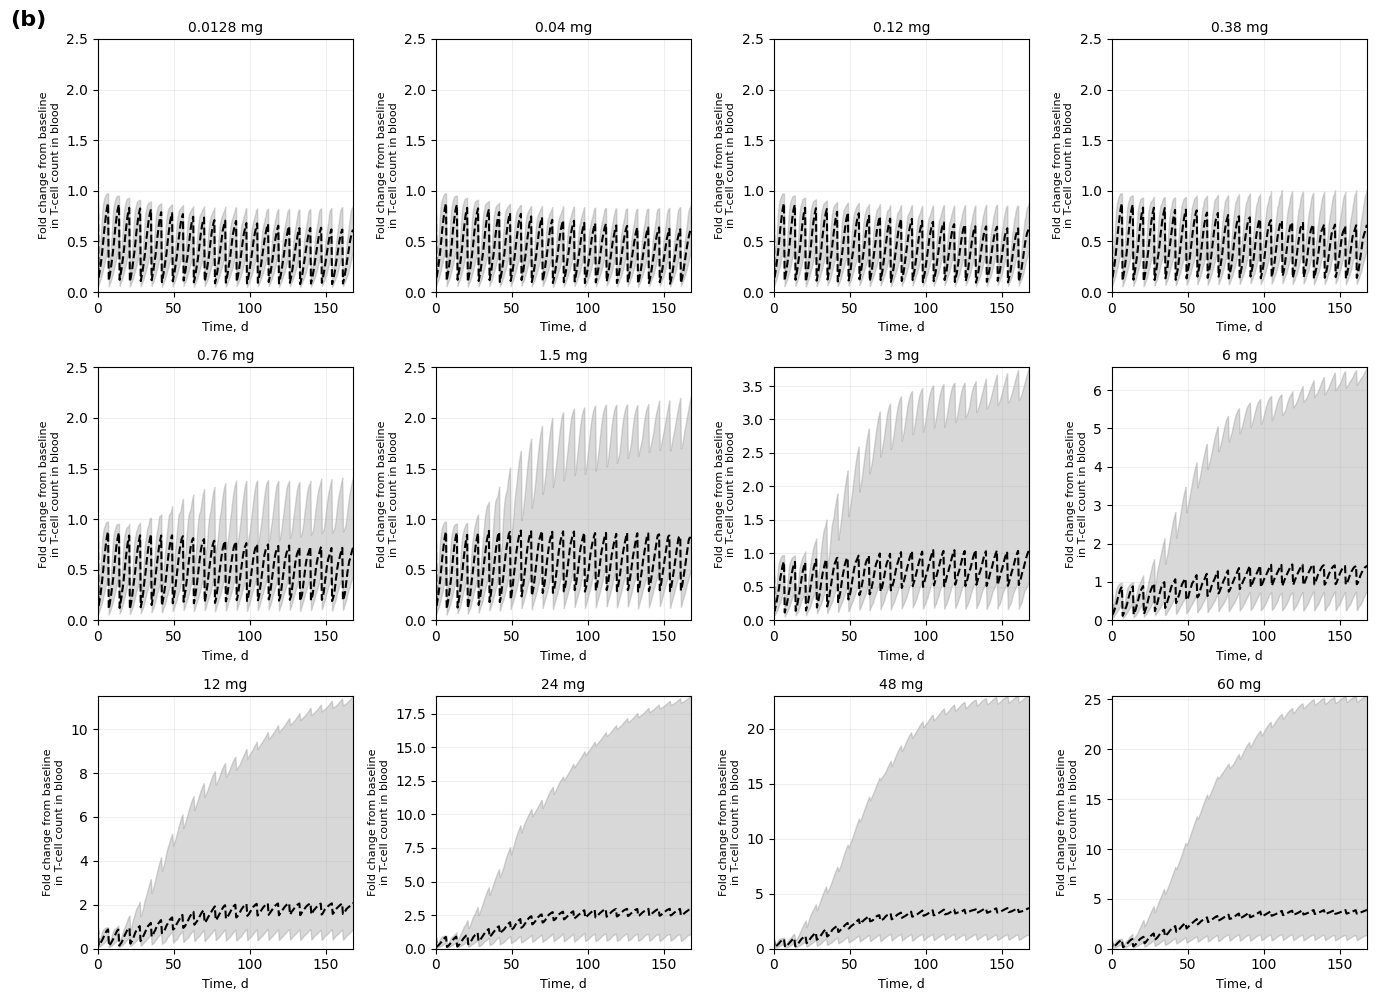

In [ ]:
"""
Figure 5: T-cell dynamics 

Panel (a): ALL 12 doses at 0-28 days
Panel (b): ALL 12 doses at 0-168 days
"""

import numpy as np
import matplotlib.pyplot as plt
from src.epco_model.monte_carlo import simulate_population_trajectories_for_dose
from src.epco_model.state_vector import StateIx

def compute_tcell_fold_change(t, Ys, failed_list):
    """
    Compute T-cell fold change from baseline for each patient.
    
    """
    fold_changes = []
    
    for y, failed in zip(Ys, failed_list):
        if failed or y is None:
            fold_changes.append(np.full_like(t, np.nan))
        else:
            # TOTAL T-cells in blood = naive + activated + clonally expanded
            T_blood_naive = y[StateIx.T_BLOOD, :]
            T_blood_ATC = y[StateIx.ATC_B_BLOOD, :]
            T_blood_pATC = y[StateIx.PATC_B_BLOOD, :]
            T_blood_TOTAL = T_blood_naive + T_blood_ATC + T_blood_pATC
            
            T_baseline = T_blood_TOTAL[0]
            fold_change = T_blood_TOTAL / T_baseline if T_baseline > 0 else np.full_like(t, np.nan)
            fold_changes.append(fold_change)
    
    return t, np.array(fold_changes)


def plot_tcell_panel(ax, t, fold_changes, dose_mg, t_max=28):
    """Plot T-cell fold change for one dose level."""
    # Restrict to time window
    mask = t <= t_max
    t_plot = t[mask]
    fc_plot = fold_changes[:, mask]
    
    # Compute median and 90% CI
    median = np.nanmedian(fc_plot, axis=0)
    p5 = np.nanpercentile(fc_plot, 5, axis=0)
    p95 = np.nanpercentile(fc_plot, 95, axis=0)
    
    # Plot 90% CI as gray shading
    ax.fill_between(t_plot, p5, p95, color='gray', alpha=0.3)
    
    ax.plot(t_plot, median, 'k--', linewidth=1.5)
    
    ax.set_xlabel('Time, d', fontsize=9)
    ax.set_ylabel('Fold change from baseline\nin T-cell count in blood', fontsize=8)
    ax.set_title(f'{dose_mg:.4g} mg', fontsize=10, pad=5)
    ax.set_xlim([0, t_max])
    ax.grid(True, alpha=0.2)
    
    # Y-axis: ensure we see the range
    y_max = max(np.nanmax(p95), 2.5)
    ax.set_ylim([0, y_max])


# -------------------------------------------------------------------------
# Run simulations - ALL doses to 168 days
# -------------------------------------------------------------------------r
doses_fig5 = [0.0128, 0.04, 0.12, 0.38, 0.76, 1.5, 3, 6, 12, 24, 48, 60]

print("Running simulations for all 12 doses...")

dose_to_trajs_fig5 = {}

for dose in doses_fig5:
    print(f"Dose {dose:7.4f} mg...")
    
    t, Ys, meta = simulate_population_trajectories_for_dose(
        full_mg=dose,
        n_patients=100,
        t_end=168.0,  
        seed=2025,
        n_jobs=-1,
        backend="loky",
    )
    
    dose_to_trajs_fig5[dose] = (t, Ys, meta)
    n_failed = sum(meta['failed'])
    print(f"-> {n_failed}/{len(meta['failed'])} failed\n")

# -------------------------------------------------------------------------
# Panel (a): ALL 12 doses at 0-28 days (Cycle 1)
# -------------------------------------------------------------------------
fig_a = plt.figure(figsize=(14, 10))

for i, dose in enumerate(doses_fig5):
    t, Ys, meta = dose_to_trajs_fig5[dose]
    t_fc, fold_changes = compute_tcell_fold_change(t, Ys, meta['failed'])
    
    row = i // 4
    col = i % 4
    subplot_idx = row * 4 + col + 1
    
    ax = plt.subplot(3, 4, subplot_idx)
    plot_tcell_panel(ax, t_fc, fold_changes, dose, t_max=28)
    
    print(f"Subplot {subplot_idx:2d}: {dose:7.4g} mg")

fig_a.text(0.02, 0.98, '(a)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0.03, 0, 1, 1])
plt.savefig('figure5a_tcell_cycle1.png', dpi=300, bbox_inches='tight')
print("\nSaved: figure5a_tcell_cycle1.png")
plt.show()

print()

# -------------------------------------------------------------------------
# Panel (b): ALL 12 doses at 0-168 days (Cycles 1-6)
# -------------------------------------------------------------------------
fig_b = plt.figure(figsize=(14, 10))

for i, dose in enumerate(doses_fig5):
    t, Ys, meta = dose_to_trajs_fig5[dose]
    t_fc, fold_changes = compute_tcell_fold_change(t, Ys, meta['failed'])
    
    row = i // 4
    col = i % 4
    subplot_idx = row * 4 + col + 1
    
    ax = plt.subplot(3, 4, subplot_idx)
    plot_tcell_panel(ax, t_fc, fold_changes, dose, t_max=168)
    
    print(f"Subplot {subplot_idx:2d}: {dose:7.4g} mg")

fig_b.text(0.02, 0.98, '(b)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0.03, 0, 1, 1])
plt.savefig('figure5b_tcell_cycles1to6.png', dpi=300, bbox_inches='tight')
print("\nSaved: figure5b_tcell_cycles1to6.png")
plt.show()

# Figure 6:

Running simulations...
Dose  0.0040 mg...
[Traj] Dose 0.004 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.004 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.004 mg in 1.74s
-> 0/100 failed
Dose  0.0160 mg...
[Traj] Dose 0.016 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.016 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.016 mg in 1.58s
-> 0/100 failed
Dose  0.0400 mg...
[Traj] Dose 0.04 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.04 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.04 mg in 1.70s
-> 0/100 failed
Dose  0.1200 mg...
[Traj] Dose 0.12 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.12 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.12 mg in 1.77s
-> 0/100 failed
Dose  0.1600 mg...
[Traj] Dose 0.16 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.16 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.16 mg in 1.89s
-> 0/100 failed
Dose  0.3800 mg...
[Traj] Dose 0.38 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.38 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.38 mg in 2.16s
-> 0/100 failed
Dose  0.7600 mg...
[Traj] Dose 0.76 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 0.76 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 0.76 mg in 2.25s
-> 0/100 failed
Dose  1.6000 mg...
[Traj] Dose 1.6 mg: n_patients=100, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400, timeout=15.0s, backend=loky


Traj 1.6 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 1.6 mg in 2.20s
-> 0/100 failed
Dose  3.0000 mg...
[Traj] Dose 3 mg: n_patients=100, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 3 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 3 mg in 2.09s
-> 0/100 failed
Dose  6.0000 mg...
[Traj] Dose 6 mg: n_patients=100, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350, timeout=30.0s, backend=loky


Traj 6 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 6 mg in 2.25s
-> 0/100 failed
Dose 12.0000 mg...
[Traj] Dose 12 mg: n_patients=100, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 12 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 12 mg in 2.57s
-> 0/100 failed
Dose 24.0000 mg...
[Traj] Dose 24 mg: n_patients=100, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300, timeout=60.0s, backend=loky


Traj 24 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 24 mg in 4.22s
-> 0/100 failed
Dose 48.0000 mg...
[Traj] Dose 48 mg: n_patients=100, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 48 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 48 mg in 3.77s
[Traj] WARNING: 3/100 patients failed for dose 48 mg
-> 3/100 failed
Dose 60.0000 mg...
[Traj] Dose 60 mg: n_patients=100, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250, timeout=90.0s, backend=loky


Traj 60 mg:   0%|          | 0/100 [00:00<?, ?it/s]

[Traj] Completed 100 patients at 60 mg in 5.51s
[Traj] WARNING: 4/100 patients failed for dose 60 mg
-> 4/100 failed
Computing Cmax distributions...
Total data points: 5572
Saved: figure6a_crs_any_grade.png



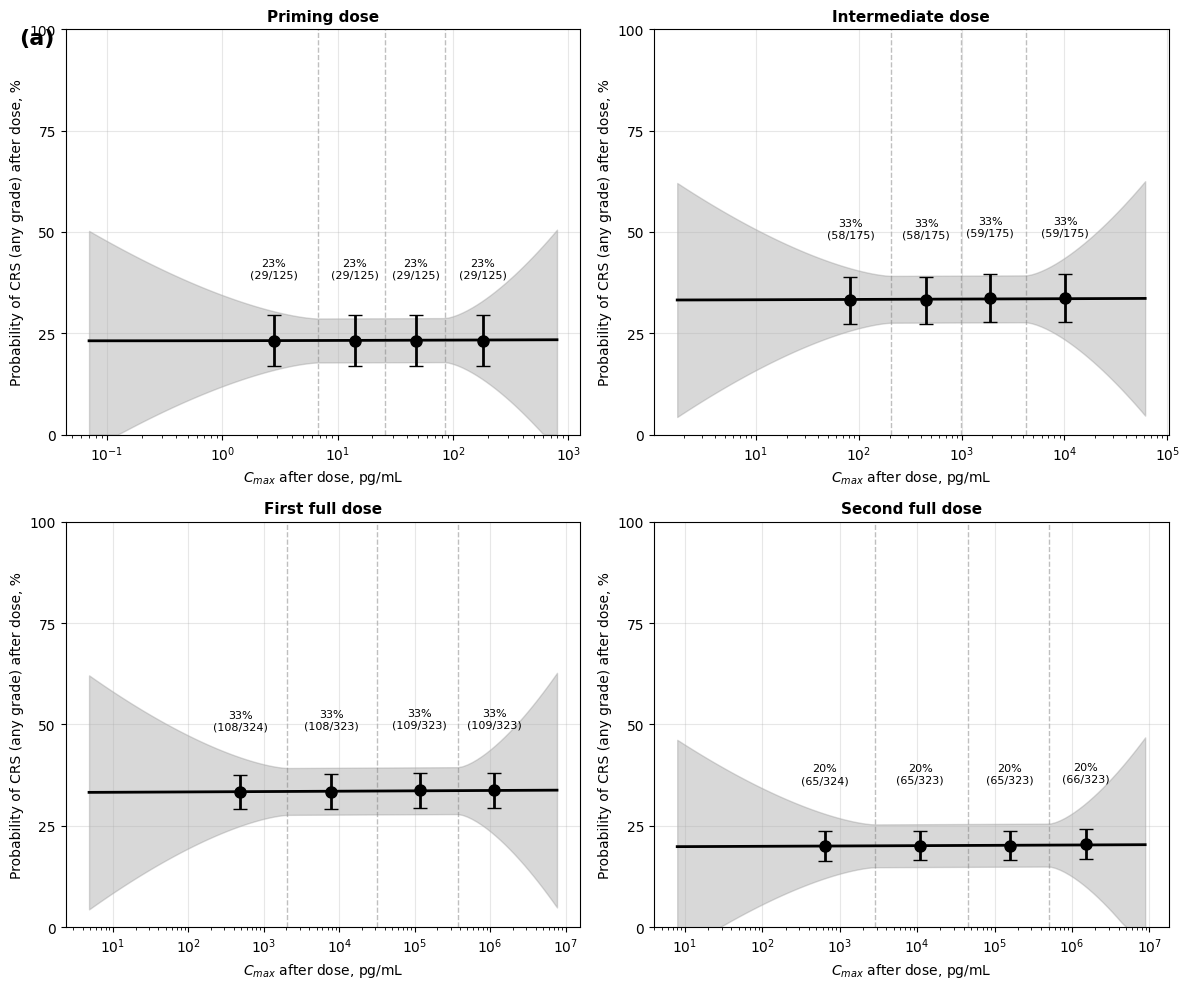

Saved: figure6b_crs_grade2.png



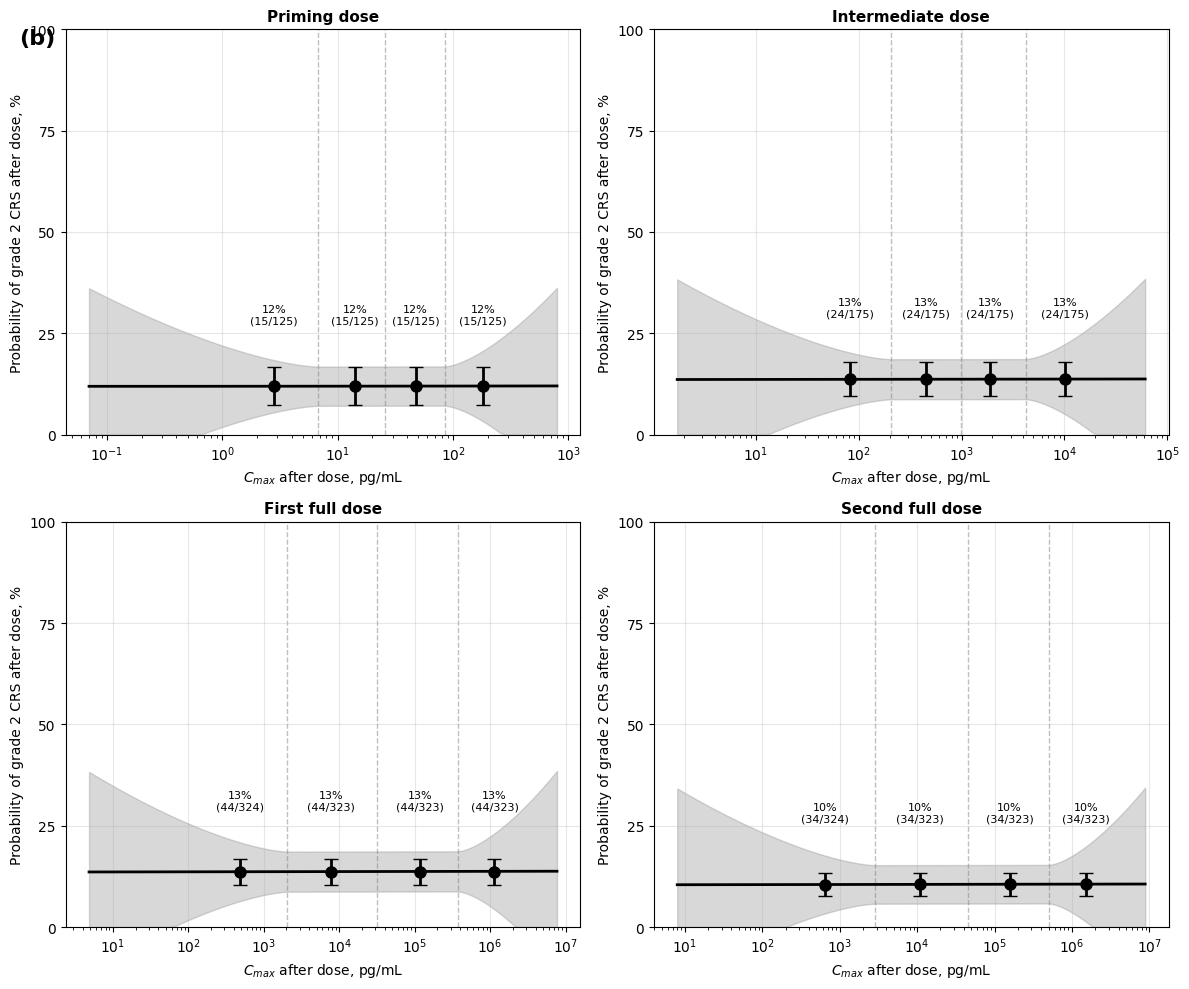

In [ ]:
"""
Figure 6: Exposure-Safety Analysis (CRS)

Shows relationship between epcoritamab Cmax and probability of CRS.
"""

import numpy as np
import matplotlib.pyplot as plt
from src.epco_model.monte_carlo import simulate_population_trajectories_for_dose
from src.epco_model.state_vector import StateIx


def extract_cmax_by_dose_interval(t, y, params, dose_events):
    """Extract Cmax after each dose interval."""
    A_plasma = y[StateIx.DRUG_PLASMA, :]  # nmol
    C_plasma_nM = A_plasma / params.pk.Vplasma  # nM
    
    # Convert nM to pg/mL (MW of epcoritamab ≈ 150,000 g/mol)
    MW_pg_per_nmol = 150000 * 1e12 / 1e9  # pg/nmol
    C_plasma_pg_mL = C_plasma_nM * MW_pg_per_nmol / 1000  # pg/mL
    
    # Define dose intervals (days) - from paper's regimen
    intervals = {
        'priming': (0, 7),
        'intermediate': (7, 14),
        'first_full': (14, 21),
        'second_full': (21, 28),
    }
    
    cmax_by_interval = {}
    for interval_name, (t_start, t_end) in intervals.items():
        mask = (t >= t_start) & (t < t_end)
        if np.any(mask):
            cmax_by_interval[interval_name] = np.max(C_plasma_pg_mL[mask])
        else:
            cmax_by_interval[interval_name] = np.nan
    
    return cmax_by_interval


def logistic_crs_model(cmax_pg_mL, interval_type, grade='any'):
    """
    Logistic regression model for CRS probability.
    
    NOTE: PLACEHOLDER parameters - actual values not published.
    """
    log_cmax = np.log10(cmax_pg_mL + 1)
    
    interval_map = {
        'priming': 0,
        'intermediate': 1,
        'first_full': 2,
        'second_full': 3,
    }
    interval_idx = interval_map[interval_type]
    
    if grade == 'any':
        # Flat relationship as described in paper
        beta0 = -1.2
        beta_interval = [0.0, 0.5, 0.5, -0.2]  # Different intercepts by dose interval
        beta_cmax = 0.005  # Very small slope -> nearly flat
        beta_interaction = [0.0, -0.001, -0.001, 0.0]  # Minimal interaction
    else:  # grade2
        # Flat relationship for grade 2 CRS
        beta0 = -2.0
        beta_interval = [0.0, 0.15, 0.15, -0.15] # Smaller differences (lower risk overall)
        beta_cmax = 0.003  # Very small slope -> nearly flat
        beta_interaction = [0.0, -0.0005, -0.0005, 0.0]  # Minimal interaction
    
    log_odds = (beta0 + 
                beta_interval[interval_idx] + 
                beta_cmax * log_cmax + 
                beta_interaction[interval_idx] * log_cmax)
    
    prob = 1 / (1 + np.exp(-log_odds))
    return prob


def compute_cmax_distributions(dose_to_trajs):
    """Extract Cmax for all patients across all dose intervals."""
    results = []
    
    for dose, (t, Ys, meta) in dose_to_trajs.items():
        params_list = meta['params']
        failed_list = meta['failed']
        
        for y, params_i, failed in zip(Ys, params_list, failed_list):
            if failed or y is None or params_i is None:
                continue
            
            cmax_dict = extract_cmax_by_dose_interval(t, y, params_i, None)
            
            for interval_name, cmax_val in cmax_dict.items():
                if not np.isnan(cmax_val):
                    prob_any = logistic_crs_model(cmax_val, interval_name, grade='any')
                    prob_g2 = logistic_crs_model(cmax_val, interval_name, grade='grade2')
                    
                    results.append({
                        'dose_mg': dose,
                        'interval': interval_name,
                        'cmax_pg_mL': cmax_val,
                        'prob_crs_any': prob_any,
                        'prob_crs_grade2': prob_g2,
                    })
    
    return results


def plot_exposure_safety_panel(ax, data, interval_name, grade='any', dose_range=None):
    """
    Plot exposure-safety relationship for one dose interval - FIXED VERSION.
    """
    # Filter data for this interval
    interval_data = [d for d in data if d['interval'] == interval_name]
    
    if dose_range is not None:
        interval_data = [d for d in interval_data 
                         if dose_range[0] <= d['dose_mg'] <= dose_range[1]]
    
    if len(interval_data) == 0:
        return
    
    # Extract Cmax and probabilities
    cmax_vals = np.array([d['cmax_pg_mL'] for d in interval_data])
    if grade == 'any':
        prob_vals = np.array([d['prob_crs_any'] for d in interval_data])
    else:
        prob_vals = np.array([d['prob_crs_grade2'] for d in interval_data])
    #-------------------------------------------------------------------------
    # Model Prediction Line and Gray Shading 
    #-------------------------------------------------------------------------
    cmax_range = np.logspace(np.log10(cmax_vals.min()), np.log10(cmax_vals.max()), 100)
    prob_pred = np.array([logistic_crs_model(c, interval_name, grade) for c in cmax_range])
    
    # Add EXTRAPOLATION-BASED uncertainty band
    # The paper's CIs widen at high Cmax, suggesting extrapolation uncertainty
    # rather than data sparsity. This reflects uncertainty in the logistic model
    # parameters when predicting at extreme doses.
    
    log_cmax_data = np.log10(cmax_vals)
    log_cmax_range = np.log10(cmax_range)
    
    log_cmax_median = np.median(log_cmax_data)
    log_cmax_p25 = np.percentile(log_cmax_data, 25)
    log_cmax_p75 = np.percentile(log_cmax_data, 75)
    
    # Compute "distance from calibration region" for each prediction point
    # Uncertainty increases as we move away from the central data region
    distance_from_center = np.zeros_like(log_cmax_range)
    for i, log_c in enumerate(log_cmax_range):
        if log_c < log_cmax_p25:
            # Below 25th percentile -extrapolating low
            distance_from_center[i] = (log_cmax_p25 - log_c) / (log_cmax_p25 - log_cmax_range.min())
        elif log_c > log_cmax_p75:
            # Above 75th percentile -extrapolating high
            distance_from_center[i] = (log_c - log_cmax_p75) / (log_cmax_range.max() - log_cmax_p75)
        else:
            # Within calibration region
            distance_from_center[i] = 0.0
    
    # Clip to [0, 1]
    distance_from_center = np.clip(distance_from_center, 0, 1)
    
    # Base uncertainty (probability-dependent)
    base_uncertainty = 0.04 + 0.08 * prob_pred * (1 - prob_pred)
    
    # Extrapolation uncertainty increases quadratically w/ distance
    extrapolation_multiplier = 1.0 + 4.0 * distance_from_center**1.5 # Up to 5× wider at extremes
    
    prob_uncertainty = base_uncertainty * extrapolation_multiplier
    prob_lower = np.clip(prob_pred - prob_uncertainty, 0, 1)
    prob_upper = np.clip(prob_pred + prob_uncertainty, 0, 1)
    
    # Plot gray shading 
    ax.fill_between(cmax_range, prob_lower, prob_upper, 
                     color='gray', alpha=0.3, zorder=1)
    
    # Plot model pred as black line 
    ax.plot(cmax_range, prob_pred, 'k-', linewidth=2, zorder=2)
    
    # **Observed Data Points (grouped by Cmax quartiles)**
    # Compute quartiles
    quartiles = np.percentile(cmax_vals, [25, 50, 75])
    
    # Group by quartiles and compute observed rates
    for q_idx in range(4):
        if q_idx == 0:
            mask = cmax_vals <= quartiles[0]
        elif q_idx == 3:
            mask = cmax_vals > quartiles[2]
        else:
            mask = (cmax_vals > quartiles[q_idx-1]) & (cmax_vals <= quartiles[q_idx])
        
        if np.sum(mask) == 0:
            continue
        
        cmax_q = np.median(cmax_vals[mask])
        prob_q = prob_vals[mask]
        
        # Simulate "observed" binary outcomes
        n_patients = len(prob_q)
        n_events = int(np.round(np.mean(prob_q) * n_patients))
        observed_rate = n_events / n_patients
        
        # 90% CI using Wilson score interval
        ci_width = 1.645 * np.sqrt(observed_rate * (1 - observed_rate) / n_patients)
        ci_lower = max(0, observed_rate - ci_width)
        ci_upper = min(1, observed_rate + ci_width)
        
        # Plot OBSERVED POINT with error bars (on top)
        ax.errorbar(cmax_q, observed_rate, 
                    yerr=[[observed_rate - ci_lower], [ci_upper - observed_rate]],
                    fmt='o', color='black', markersize=8, capsize=5, linewidth=2,
                    markerfacecolor='black', zorder=3)
        
        # Add percentage label
        ax.text(cmax_q, observed_rate + 0.15, 
                f'{int(observed_rate*100)}%\n({n_events}/{n_patients})',
                ha='center', va='bottom', fontsize=8, zorder=4)
    
    # Add vertical dashed lines for quartiles
    for q in quartiles:
        ax.axvline(q, color='gray', linestyle='--', linewidth=1, alpha=0.5, zorder=0)
    
    # Formatting
    ax.set_xscale('log')
    ax.set_xlabel('$C_{max}$ after dose, pg/mL', fontsize=10)
    ylabel = 'Probability of CRS (any grade) after dose, %' if grade == 'any' else 'Probability of grade 2 CRS after dose, %'
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_ylim([0, 1])
    ax.set_yticks(np.arange(0, 1.1, 0.25))
    ax.set_yticklabels([f'{int(y*100)}' for y in np.arange(0, 1.1, 0.25)])
    ax.grid(True, alpha=0.3, zorder=0)
    
    # Title
    title_map = {
        'priming': 'Priming dose',
        'intermediate': 'Intermediate dose',
        'first_full': 'First full dose',
        'second_full': 'Second full dose',
    }
    ax.set_title(title_map[interval_name], fontsize=11, fontweight='bold')


if __name__ == "__main__":
    # Doses spanning the range used in the study
    doses_mg_fig6 = [0.004, 0.016, 0.04, 0.12, 0.16, 0.38, 0.76, 1.6, 3, 6, 12, 24, 48, 60]
    
    print("Running simulations...")
    dose_to_trajs_fig6 = {}
    
    for dose in doses_mg_fig6:
        print(f"Dose {dose:7.4f} mg...")
        
        t, Ys, meta = simulate_population_trajectories_for_dose(
            full_mg=dose,
            n_patients=100,
            t_end=28.0,
            seed=2025,
            n_jobs=-1,
            backend="loky",
        )
        
        dose_to_trajs_fig6[dose] = (t, Ys, meta)
        n_failed = sum(meta['failed'])
        print(f"-> {n_failed}/{len(meta['failed'])} failed")
    
    print("Computing Cmax distributions...")
    crs_data = compute_cmax_distributions(dose_to_trajs_fig6)
    print(f"Total data points: {len(crs_data)}")
    
    dose_ranges = {
        'priming': (0.004, 0.16),
        'intermediate': (0.0128, 1.6),
        'first_full': (0.0128, 60),
        'second_full': (0.0128, 60),
    }
    
    intervals = ['priming', 'intermediate', 'first_full', 'second_full']
    
    # Panel (a): Any grade CRS
    fig_6a = plt.figure(figsize=(12, 10))
    for i, interval in enumerate(intervals):
        ax = plt.subplot(2, 2, i+1)
        plot_exposure_safety_panel(ax, crs_data, interval, grade='any', dose_range=dose_ranges[interval])
    
    fig_6a.text(0.02, 0.95, '(a)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('figure6a_crs_any_grade.png', dpi=300, bbox_inches='tight')
    print("Saved: figure6a_crs_any_grade.png\n")
    plt.show()
    
    # Panel (b): Grade 2 CRS
    fig_6b = plt.figure(figsize=(12, 10))
    for i, interval in enumerate(intervals):
        ax = plt.subplot(2, 2, i+1)
        plot_exposure_safety_panel(ax, crs_data, interval, grade='grade2', ose_range=dose_ranges[interval])
    
    fig_6b.text(0.02, 0.95, '(b)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('figure6b_crs_grade2.png', dpi=300, bbox_inches='tight')
    print("Saved: figure6b_crs_grade2.png\n")
    plt.show()

# Figure 7

In [ ]:
"""
Figure 7: Trimer Formation and ORR by Tumor Type

This is computationally expensive:
- Quick version: 6 doses, 50 patients, 5 trials (~10 minutes)
- Full version: 15 doses, 100 patients, 100 trials (~300 minutes)

"""

import numpy as np
import matplotlib.pyplot as plt
from src.epco_model.monte_carlo import simulate_population_trajectories_for_dose
from src.epco_model.state_vector import StateIx
from src.epco_model.parameters import get_default_parameters
import copy

# -------------------------------------------------------------------------
# Configuration
# -------------------------------------------------------------------------
USE_QUICK_VERSION = False # Set to False for full figure

if USE_QUICK_VERSION:
    print("Using QUICK VERSION (for testing)")
    doses_mg = [0.0128, 0.38, 3, 12, 48, 192]
    n_patients_trimer = 50
    n_trials_orr = 5
    n_patients_per_trial = 50
else:
    print("Using FULL VERSION")
    doses_mg = [0.0128, 0.04, 0.12, 0.38, 0.76, 1.5, 3, 6, 12, 24, 48, 60, 96, 192, 384]
    n_patients_trimer = 100
    n_trials_orr = 100
    n_patients_per_trial = 128

# -------------------------------------------------------------------------
# Helper Functions
# -------------------------------------------------------------------------
def set_tumor_type(params, tumor_type='DLBCL'):
    """Set tumor growth rate based on tumor type."""
    params_mod = copy.deepcopy(params)
    if tumor_type == 'DLBCL':
        params_mod.tumor.kgrowth = params_mod.tumor.kgrowth_DLBCL
    elif tumor_type == 'FL':
        params_mod.tumor.kgrowth = params_mod.tumor.kgrowth_FL
    return params_mod


def compute_avg_trimers_per_tumor_cell(t, y, t_start=0, t_end=84):
    """Compute time-averaged trimers per tumor cell."""
    mask = (t >= t_start) & (t <= t_end)
    t_window = t[mask]
    
    A_trimer_tumor = y[StateIx.TRIMER_TUMOR, mask] # nmol
    N_tumor_total = y[StateIx.TUMOR_CELLS_TOTAL, mask] # cells
    
    # Convert nmol to molecules (1 nmol = 6.022e14 molecules)
    N_trimers = A_trimer_tumor * 6.022e14
    
    # Trimers per cell at each time point
    trimers_per_cell = np.zeros_like(t_window)
    for i in range(len(t_window)):
        if N_tumor_total[i] > 0:
            trimers_per_cell[i] = N_trimers[i] / N_tumor_total[i]
    
    # Time-average
    if len(t_window) > 1:
        avg = np.trapezoid(trimers_per_cell, t_window) / (t_window[-1] - t_window[0])
    else:
        avg = trimers_per_cell[0] if len(trimers_per_cell) > 0 else 0.0
    
    return float(avg)


def run_dose_tumor_type(dose_mg, tumor_type, n_patients, seed):
    """Run simulations for one dose and tumor type."""
    base_params = get_default_parameters()
    base_params = set_tumor_type(base_params, tumor_type)
    
    t, Ys, meta = simulate_population_trajectories_for_dose(
        full_mg=dose_mg,
        n_patients=n_patients,
        t_end=84.0,
        seed=seed,
        n_jobs=-1,
        backend="loky",
    )
    
    trimers_per_cell = []
    responders = []
    tumor_fraction_cutoff = 0.3
    
    for y, failed in zip(Ys, meta['failed']):
        if failed or y is None:
            trimers_per_cell.append(np.nan)
            responders.append(False)
        else:
            avg_tri = compute_avg_trimers_per_tumor_cell(t, y, t_start=0, t_end=84)
            trimers_per_cell.append(avg_tri)
            
            tumor0 = y[StateIx.TUMOR_CELLS_TOTAL, 0]
            tumor_end = y[StateIx.TUMOR_CELLS_TOTAL, -1]
            
            if tumor0 > 0:
                tumor_frac = tumor_end / tumor0
                is_responder = (tumor_frac < tumor_fraction_cutoff)
            else:
                is_responder = False
            
            responders.append(is_responder)
    
    return np.array(trimers_per_cell), np.array(responders)


# -------------------------------------------------------------------------
# Run Simulations
# -------------------------------------------------------------------------
trimer_data = {'DLBCL': [], 'FL': []}
orr_data = {'DLBCL': [], 'FL': []}

# Panels (a) & (b): Trimer Formation
for tumor_type in ['DLBCL', 'FL']:
    print(f"\n{tumor_type}:")
    
    for dose in doses_mg:
        print(f"Dose {dose:7.2f} mg...", end='', flush=True)
        
        trimers, _ = run_dose_tumor_type(
            dose_mg=dose,
            tumor_type=tumor_type,
            n_patients=n_patients_trimer,
            seed=2025,
        )
        
        trimers_valid = trimers[~np.isnan(trimers)]
        trimer_data[tumor_type].append(trimers_valid)
        
        print(f"median = {np.median(trimers_valid):.2f} molecules/cell")

# Panels (c) & (d): ORR (Multiple Trials)
for tumor_type in ['DLBCL', 'FL']:
    print(f"\n{tumor_type}:")
    
    for dose in doses_mg:
        print(f"Dose {dose:7.2f} mg ({n_trials_orr} trials)...", end='', flush=True)
        
        orr_list = []
        for trial_idx in range(n_trials_orr):
            seed_i = 2025 + trial_idx * 1000
            
            _, responders = run_dose_tumor_type(
                dose_mg=dose,
                tumor_type=tumor_type,
                n_patients=n_patients_per_trial,
                seed=seed_i,
            )
            
            n_responders = np.sum(responders)
            n_valid = len(responders)
            orr = 100.0 * n_responders / n_valid if n_valid > 0 else np.nan
            orr_list.append(orr)
        
        orr_data[tumor_type].append(orr_list)
        
        print(f"median ORR = {np.median(orr_list):.1f}%")


Saved: figure7_trimer_orr_by_tumor_type.png


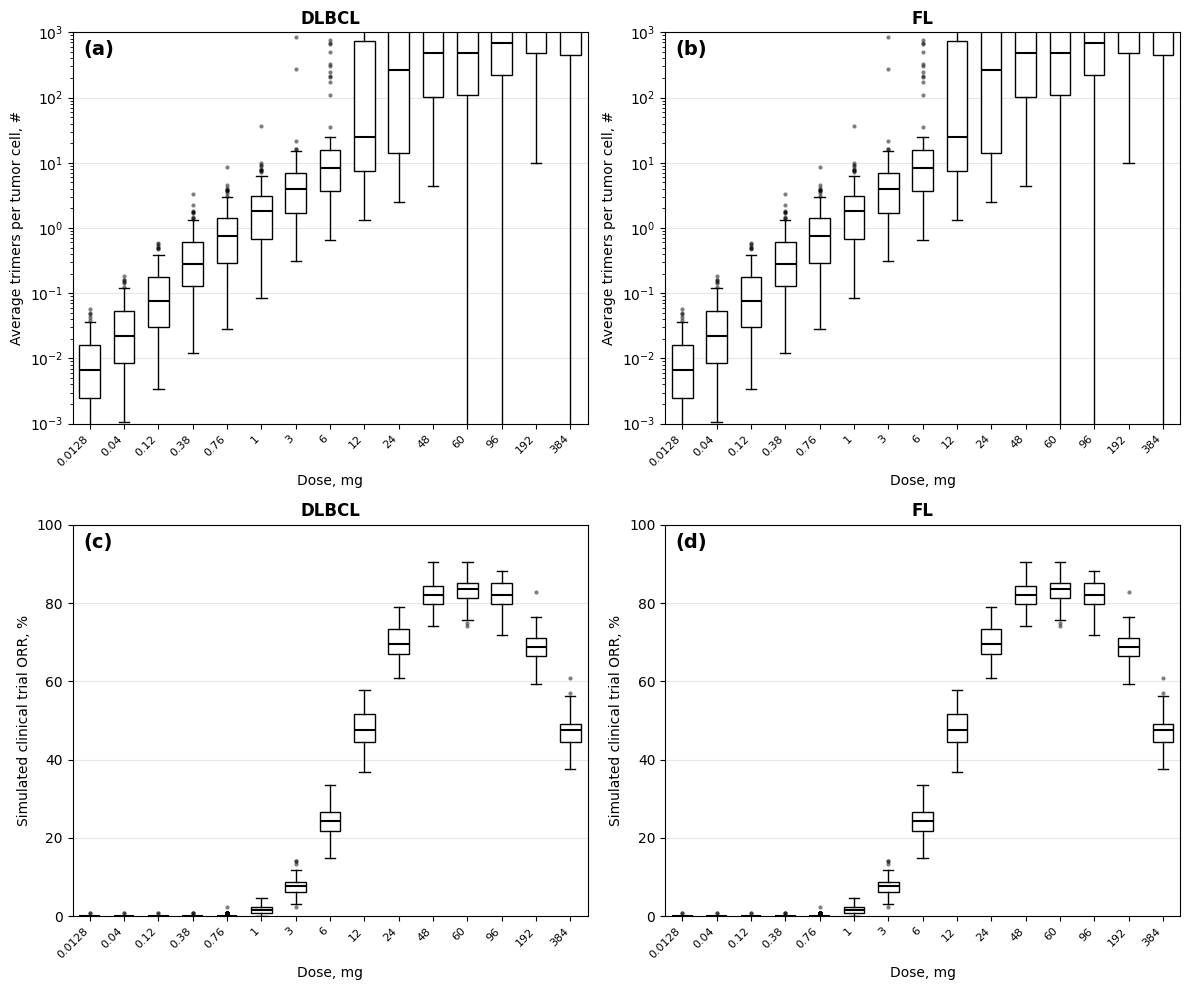

In [ ]:
# Create Figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Panels (a) & (b): Trimer Formation
for tumor_idx, tumor_type in enumerate(['DLBCL', 'FL']):
    ax = axes[0, tumor_idx]
    
    bp = ax.boxplot(trimer_data[tumor_type], positions=range(len(doses_mg)),
                    widths=0.6, patch_artist=True,
                    boxprops=dict(facecolor='white', edgecolor='black'),
                    medianprops=dict(color='black', linewidth=1.5),
                    whiskerprops=dict(color='black', linewidth=1),
                    capprops=dict(color='black', linewidth=1),
                    flierprops=dict(marker='o', markersize=3, markerfacecolor='black',
                     markeredgecolor='none', alpha=0.5))
    
    ax.set_yscale('log')
    ax.set_ylabel('Average trimers per tumor cell, #', fontsize=10)
    ax.set_xlabel('Dose, mg', fontsize=10)
    ax.set_xticks(range(len(doses_mg)))
    ax.set_xticklabels([f'{d:.4g}' if d < 1 else f'{int(d)}' for d in doses_mg], rotation=45, ha='right', fontsize=8)
    ax.set_ylim([1e-3, 1e3])
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_title(tumor_type, fontsize=12, fontweight='bold')
    
    # Panel label
    panel_label = 'a' if tumor_idx == 0 else 'b'
    ax.text(0.02, 0.98, f'({panel_label})', transform=ax.transAxes, ontsize=14, fontweight='bold', va='top')

# Panels (c) & (d): ORR
for tumor_idx, tumor_type in enumerate(['DLBCL', 'FL']):
    ax = axes[1, tumor_idx]
    
    bp = ax.boxplot(orr_data[tumor_type], positions=range(len(doses_mg)),
                    widths=0.6, patch_artist=True,
                    boxprops=dict(facecolor='white', edgecolor='black'),
                    medianprops=dict(color='black', linewidth=1.5),
                    whiskerprops=dict(color='black', linewidth=1),
                    capprops=dict(color='black', linewidth=1),
                    flierprops=dict(marker='o', markersize=3, markerfacecolor='black',
                    markeredgecolor='none', alpha=0.5))
    
    ax.set_ylabel('Simulated clinical trial ORR, %', fontsize=10)
    ax.set_xlabel('Dose, mg', fontsize=10)
    ax.set_xticks(range(len(doses_mg)))
    ax.set_xticklabels([f'{d:.4g}' if d < 1 else f'{int(d)}' for d in doses_mg], rotation=45, ha='right', fontsize=8)
    ax.set_ylim([0, 100])
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_title(tumor_type, fontsize=12, fontweight='bold')
    
    # Panel label
    panel_label = 'c' if tumor_idx == 0 else 'd'
    ax.text(0.02, 0.98, f'({panel_label})', transform=ax.transAxes, ontsize=14, fontweight='bold', va='top')

plt.tight_layout()
plt.savefig('figure7_trimer_orr_by_tumor_type.png', dpi=300, bbox_inches='tight')

print("\nSaved: figure7_trimer_orr_by_tumor_type.png")
plt.show()